In [1]:
#import the usual toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

plt.rcParams['figure.figsize'] = (14.0,11.0)
%matplotlib inline 

#things that make not pretty things prittier
from IPython.display import IFrame
import ipywidgets as widgets 


#Tools for making various API calls
import urllib
import pyowm
from bs4 import BeautifulSoup



#Tools for geo-data
from haversine import haversine
import folium
import gmplot

#misc tools
import os
import math
import simplejson


In [738]:
df_stations.to_csv('sample_data/df_stations.csv')

In [739]:
df.to_csv('sample_data/df.csv')

In [56]:
cd /Users/timibennatan/Desktop/tamirbennatan-github.io/analysis/tamir/data/citi_bikes

/Users/timibennatan/Desktop/tamirbennatan-github.io/analysis/tamir/data/citi_bikes


In [734]:
ls

2014-01 - Citi Bike trip data.csv*   201502-citibike-tripdata.csv*
2014-02 - Citi Bike trip data 2.csv* 201503-citibike-tripdata.csv*
2014-02 - Citi Bike trip data.csv*   201504-citibike-tripdata.csv*
2014-03 - Citi Bike trip data.csv*   201505-citibike-tripdata.csv*
2014-04 - Citi Bike trip data.csv*   201507-citibike-tripdata.csv*
2014-05 - Citi Bike trip data 2.csv* 201508-citibike-tripdata.csv*
2014-05 - Citi Bike trip data.csv*   201509-citibike-tripdata.csv*
2014-06 - Citi Bike trip data.csv*   201511-citibike-tripdata.csv*
2014-07 - Citi Bike trip data.csv*   201512-citibike-tripdata.csv*
2014-08 - Citi Bike trip data.csv*   201601-citibike-tripdata.csv*
201409-citibike-tripdata.csv*        201602-citibike-tripdata.csv*
201410-citibike-tripdata.csv*        201603-citibike-tripdata.csv*
201411-citibike-tripdata.csv*        201604-citibike-tripdata.csv*
201412-citibike-tripdata.csv*        201605-citibike-tripdata.csv*
201501-citibike-tripdata.csv*        201606-citibike-tripdata.

In [38]:
filelist = os.listdir('/Users/timibennatan/Desktop/tamirbennatan-github.io/analysis/tamir/data/citi_bikes')

In [139]:
#read each month's data into a pandas dataframe and put into a list.
df_list = [pd.read_csv(file).sample(frac = .05) for file in filelist]

In [ ]:
# Concatenate into one dataframe for all of 2014 – present data
df = pd.concat(df_list)

In [107]:
df.shape

(1106154, 15)

In [110]:
df.to_csv('sample.csv')

In [108]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
96392,704,2014-01-13 12:08:02,2014-01-13 12:19:46,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,40.743349,-74.006818,16950,Subscriber,1963,1
112861,360,2014-01-14 09:59:09,2014-01-14 10:05:09,229,Great Jones St,40.727434,-73.993790,2010,Grand St & Greene St,40.721655,-74.002347,15028,Subscriber,1988,1
16710,880,2014-01-04 14:12:49,2014-01-04 14:27:29,545,E 23 St & 1 Ave,40.736502,-73.978095,428,E 3 St & 1 Ave,40.724677,-73.987834,19371,Subscriber,1953,1
161708,543,2014-01-17 03:44:43,2014-01-17 03:53:46,252,MacDougal St & Washington Sq,40.732264,-73.998522,445,E 10 St & Avenue A,40.727408,-73.981420,20226,Subscriber,1974,2
241335,989,2014-01-27 07:34:47,2014-01-27 07:51:16,300,Shevchenko Pl & E 6 St,40.728145,-73.990214,422,W 59 St & 10 Ave,40.770513,-73.988038,20605,Subscriber,1971,1


In [42]:
df.head()

,starttime,tripduration,starttime.1,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,end_year,start_month,end_month,start_station_index,end_station_index,start_station_elevation,end_station_elevation,trip_elevation_delta,day_of_week,year
starttime,,,,,,,,,,,,,,,,,,,,,
2014-01-13 12:08:02,2014-01-13 12:08:02,704,2014-01-13 12:08:02,2014-01-13 12:19:46,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,...,2014,1,1,376,185,5.060242,3.328002,-1.73224,monday,2014
2014-03-16 17:44:16,2014-03-16 17:44:16,867,2014-03-16 17:44:16,2014-03-16 17:58:43,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,...,2014,3,3,376,185,5.060242,3.328002,-1.73224,sunday,2014
2014-04-12 17:38:45,2014-04-12 17:38:45,743,2014-04-12 17:38:45,2014-04-12 17:51:08,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,...,2014,4,4,376,185,5.060242,3.328002,-1.73224,saturday,2014
2014-05-31 18:36:22,2014-05-31 18:36:22,1517,2014-05-31 18:36:22,2014-05-31 19:01:39,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,...,2014,5,5,376,185,5.060242,3.328002,-1.73224,saturday,2014
2014-05-11 17:36:15,2014-05-11 17:36:15,2733,2014-05-11 17:36:15,2014-05-11 18:21:48,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,...,2014,5,5,376,185,5.060242,3.328002,-1.73224,sunday,2014


In [45]:
df.columns

Index([u'starttime', u'tripduration', u'starttime.1', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'trip_duration', u'start_date',
       u'stop_date', u'trip_distance', u'trip_distance_manhattan',
       u'start_year', u'end_year', u'start_month', u'end_month',
       u'start_station_index', u'end_station_index',
       u'start_station_elevation', u'end_station_elevation',
       u'trip_elevation_delta', u'day_of_week', u'year'],
      dtype='object')

In [111]:
df.starttime, df.stoptime = pd.to_datetime(df.starttime), pd.to_datetime(df.stoptime)

In [40]:
#Replace current timestamps (strings) as Pandas DatetimeIndex objects for more flexibility
df['starttime'], df['stoptime'] = pd.DatetimeIndex(df.starttime) , pd.DatetimeIndex(df.stoptime) 

In [41]:
#Also make the dataframe index the 'starttime' DatetimeIndex for convenience
df.index = df['starttime']

##### Make a table with metadata about each station for reference

In [302]:
stations_grouped = df.groupby('start station id')

In [303]:
df_stations = stations_grouped['start station name','start station latitude',
                               'start station longitude'].min()

In [335]:
df_stations.index.rename('station_id', inplace = True)

df_stations.columns = ['station_name', 
                      'station_latitude', 'station_longitude']


In [359]:
df_stations['location_point'] = [(df_stations.reset_index(drop = False).station_latitude[i],
  df_stations.reset_index(drop = False).station_longitude[i])
                                for i in range(df_stations.shape[0])]

In [360]:
df_stations.sort(['station_longitude', 'station_latitude'], inplace = True)

In [361]:
df_stations.head()

,station_name,station_latitude,station_longitude,location_point
station_id,,,,
363,West Thames St,40.708347,-74.017134,"(40.70834698, -74.01713445)"
3182,Yankee Ferry Terminal,40.686931,-74.016966,"(40.686931, -74.016966)"
2008,Little West St & 1 Pl,40.705693,-74.016777,"(40.70569254, -74.01677685)"
327,Vesey Pl & River Terrace,40.715338,-74.016584,"(40.7153379, -74.01658354)"
3181,Soissons Landing,40.692609,-74.016398,"(40.692609, -74.016398)"


I'll index each point as the euclidean distance away from the most SouthWest station: West Thames St

In [363]:
initial_point = df_stations.iloc[0].location_point

In [365]:
df_stations['dist_from_initial_point'] = [haversine(initial_point, df_stations.iloc[i].location_point)
                                         for i in range(df_stations.shape[0])]

In [372]:
df_stations.sort('dist_from_initial_point', inplace = True)
df_stations['station_index'] = range(df_stations.shape[0])
df_stations.drop('dist_from_initial_point', inplace = True, axis = 1)
df_stations.head()

,station_name,station_latitude,station_longitude,location_point,station_index
station_id,,,,,
363,West Thames St,40.708347,-74.017134,"(40.70834698, -74.01713445)",0
2008,Little West St & 1 Pl,40.705693,-74.016777,"(40.70569254, -74.01677685)",1
3002,South End Ave & Liberty St,40.711512,-74.015756,"(40.711512, -74.015756)",2
304,Broadway & Battery Pl,40.704633,-74.013617,"(40.70463334, -74.01361706)",3
195,Liberty St & Broadway,40.709056,-74.010434,"(40.70905623, -74.01043382)",4


In [503]:
df_stations.shape[0]

502

In [514]:
def get_elevation(df):
    
    #base url – I've requested the response to be in json
    url_0 = 'http://maps.googleapis.com/maps/api/elevation/json?locations='
    url_1 = url_0
    
    #add longitude and latitude tuples. 
    # NOTE: Google limites requests (documentation says 512 locations per request, but it breaks for me
    # at around 400.) Split requesets in half: first 300 and then the rest
    
    #first 300 requests
    for i in range(300):
        url_0 += str(df.iloc[i]['station_latitude'])
        url_0 += ','
        url_0 += str(df.iloc[i]['station_longitude'])
        url_0 += '|'
        
    #the remaining 202 requests
    for i in range(300, df.shape[0]):
        url_1 += str(df.iloc[i]['station_latitude'])
        url_1 += ','
        url_1 += str(df.iloc[i]['station_longitude'])
        url_1 += '|'
    
    
    #remove final, uneccesary pipes
    url_0 = url_0[:-1]
    url_1 = url_1[:-1]
    
    #json responses
    response_0 = simplejson.load(urllib.urlopen(url_0))
    response_1 = simplejson.load(urllib.urlopen(url_1))
    
    #convert to list of elevations and return. Tested: order is stable
    return [response_0['results'][i]['elevation'] 
            for i in range(len(response_0['results']))] + [response_1['results'][i]['elevation']
                                                           for i in range(len(response_1['results']))]

In [515]:
df_stations['station_elevation'] = get_elevation(df_stations)

In [516]:
df_stations.head()

,station_name,station_latitude,station_longitude,location_point,station_index,station_elevation
station_id,,,,,,
363,West Thames St,40.708347,-74.017134,"(40.70834698, -74.01713445)",0,0.444348
2008,Little West St & 1 Pl,40.705693,-74.016777,"(40.70569254, -74.01677685)",1,1.010823
3002,South End Ave & Liberty St,40.711512,-74.015756,"(40.711512, -74.015756)",2,0.602172
304,Broadway & Battery Pl,40.704633,-74.013617,"(40.70463334, -74.01361706)",3,4.467061
195,Liberty St & Broadway,40.709056,-74.010434,"(40.70905623, -74.01043382)",4,9.448026


In [364]:
initial_point

(40.708346980000002, -74.01713445)

In [391]:
df = df.merge(df_stations[['station_index']], how = 'inner', 
         left_on = 'start station id', right_index = True )

df = df.merge(df_stations[['station_index']], how = 'inner', 
         left_on = 'end station id', right_index = True )

df.columns = df.columns[:-2].tolist() + ['start_station_index', 'end_station_index']


In [525]:
df.drop(u'station_elevation' ,axis = 1, inplace = True)

In [527]:
df = df.merge(df_stations[['station_elevation']], how = 'inner', 
         left_on = 'start station id', right_index = True )

df = df.merge(df_stations[['station_elevation']], how = 'inner', 
         left_on = 'end station id', right_index = True )

df.columns = df.columns[:-2].tolist() + ['start_station_elevation', 'end_station_elevation']

In [530]:
# calculate trip elevation delta
df['trip_elevation_delta'] = df.end_station_elevation - df.start_station_elevation

In [548]:
df.ix[:, 26:].sample(10)

,start_station_elevation,end_station_elevation,trip_elevation_delta
66106,3.326792,0.259000,-3.067791
119636,12.961581,4.593605,-8.367977
723607,24.026514,18.207771,-5.818743
312779,0.259000,1.262304,1.003304
1019494,5.034296,17.547497,12.513201
367085,3.508066,10.375432,6.867366
535072,12.449867,11.803291,-0.646576
431102,10.070917,4.020314,-6.050603
46659,12.972703,12.196189,-0.776514
87246,15.696590,23.711721,8.015131


In [565]:
df_daily['trip_distance'].index.dayofweek

In [717]:
df_daily.head()

,trip_elevation_delta,trip_distance,trip_distance_manhattan
starttime,,,
2014-01-01,-0.035752,0.014513,0.018568
2014-01-02,0.031135,0.014834,0.018832
2014-01-03,1.364368,0.013258,0.016457
2014-01-04,-0.008327,0.014833,0.019085
2014-01-05,0.354622,0.014034,0.018064


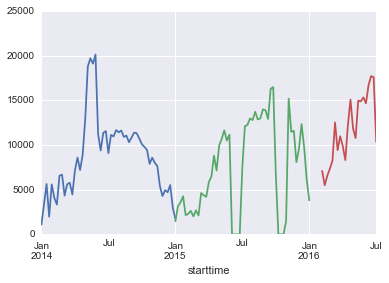

In [73]:
df[df.year == 2014].resample('w').size().plot()
df[df.year == 2015].resample('w').size().plot()
df[df.year == 2016].resample('w').size().plot()

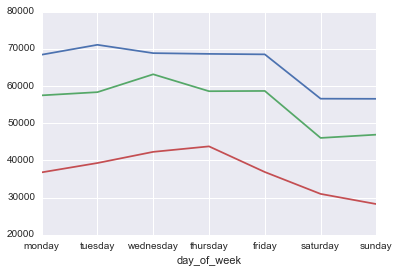

In [81]:
df[df.year == 2014].groupby('day_of_week').size()[['monday', 'tuesday', 'wednesday', 
                                                  'thursday', 'friday', 'saturday', 
                                                  'sunday']].plot()
df[df.year == 2015].groupby('day_of_week').size()[['monday', 'tuesday', 'wednesday', 
                                                  'thursday', 'friday', 'saturday', 
                                                  'sunday']].plot()
df[df.year == 2016].groupby('day_of_week').size()[['monday', 'tuesday', 'wednesday', 
                                                  'thursday', 'friday', 'saturday', 
                                                  'sunday']].plot()

In [407]:
trip_occurnece_matrix = pd.pivot_table(df[['start_station_index', 'end_station_index']], 
              index =  'start_station_index', columns = 'end_station_index',
              aggfunc = len, fill_value = 0)

In [438]:
trip_occurnece_matrix_suscriber = pd.pivot_table(df[df.usertype == 'Subscriber'][['start_station_index', 'end_station_index']], 
              index =  'start_station_index', columns = 'end_station_index',
              aggfunc = len, fill_value = 0)

In [439]:
trip_occurnece_matrix_customer = pd.pivot_table(df[df.usertype == 'Customer'][['start_station_index', 'end_station_index']], 
              index =  'start_station_index', columns = 'end_station_index',
              aggfunc = len, fill_value = 0)

In [415]:
trip_occurnece_matrix.max().max()


1697

In [431]:
trip_occurnece_matrix

end_station_index,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
start_station_index,,,,,,,,,,,,,,,,,,,,,
0,157,63,194,114,37,56,29,20,52,104,...,0,3,0,1,0,0,0,0,0,0
1,41,143,241,51,30,21,12,15,23,40,...,0,8,0,1,0,1,0,0,0,0
2,203,246,205,219,92,60,34,44,70,242,...,0,6,0,0,1,5,1,0,0,0
3,103,98,202,99,40,23,20,21,40,16,...,2,5,0,0,1,3,0,0,0,0
4,40,37,101,67,65,63,44,12,92,35,...,0,0,0,1,0,1,0,0,0,0
5,38,20,41,19,37,32,19,18,6,5,...,0,0,0,0,0,0,0,0,0,0
6,33,12,32,17,22,19,41,28,29,3,...,1,0,0,0,0,0,0,0,1,0
7,19,17,51,31,18,19,18,23,27,17,...,0,0,0,1,0,1,0,0,1,0
8,39,35,70,23,37,4,23,19,38,10,...,0,1,0,0,0,1,0,0,1,0


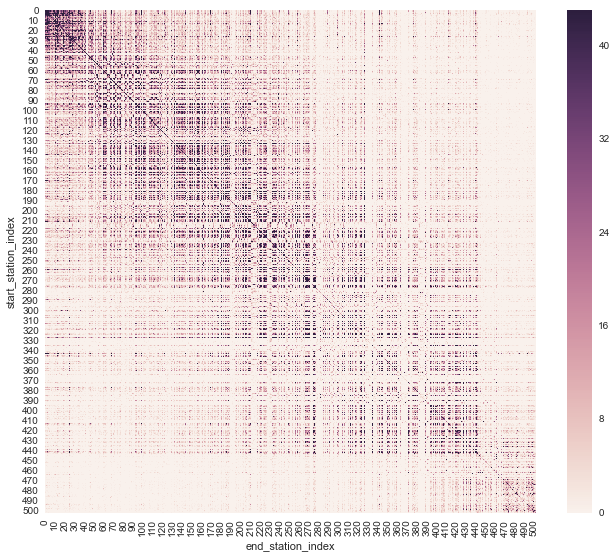

In [435]:
fig, ax = plt.subplots()
fig.set_size_inches(11,9)

sns.heatmap(trip_occurnece_matrix, xticklabels=10, yticklabels=10, robust = True )

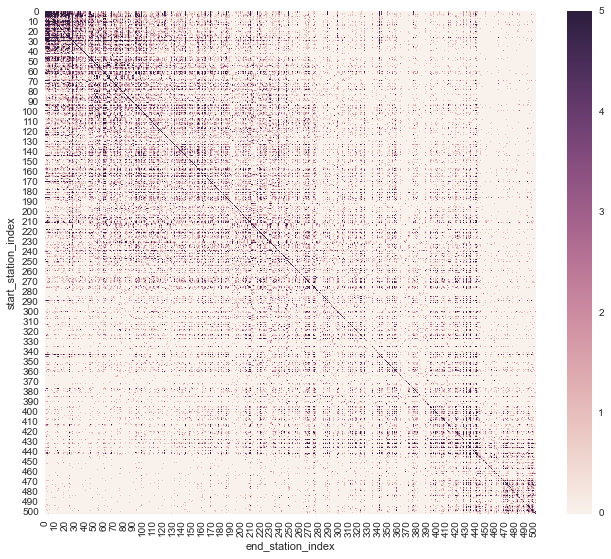

In [444]:
fig, ax = plt.subplots()
fig.set_size_inches(11,9)

sns.heatmap(trip_occurnece_matrix_customer, xticklabels=10, yticklabels=10, robust = True )

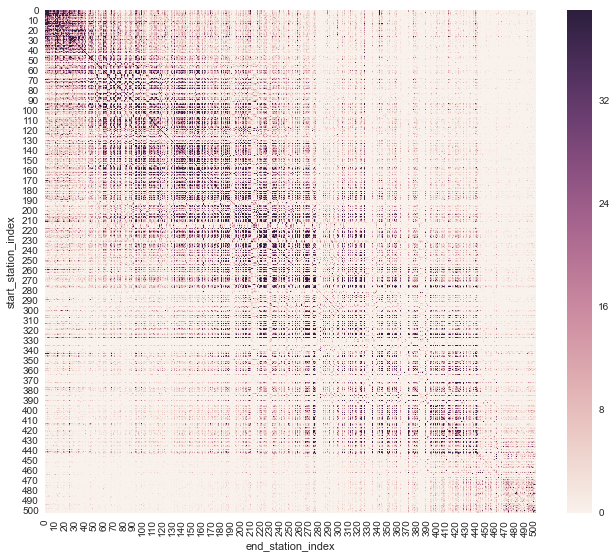

In [445]:
fig, ax = plt.subplots()
fig.set_size_inches(11,9)

sns.heatmap(trip_occurnece_matrix_suscriber, xticklabels=10, yticklabels=10, robust = True )

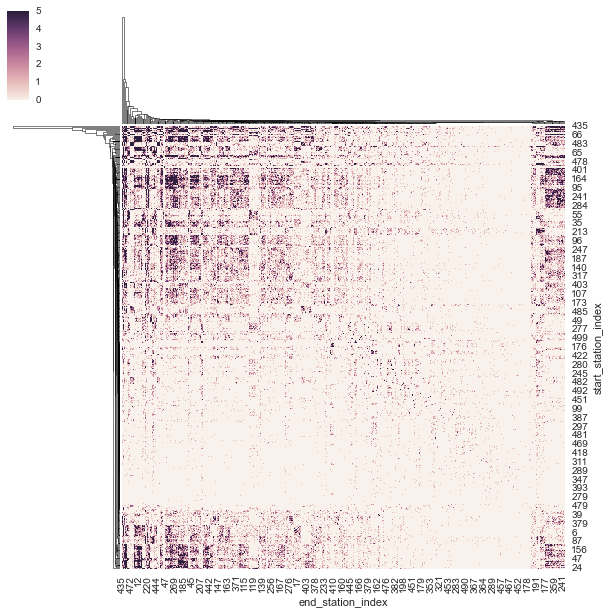

In [448]:
sns.clustermap(trip_occurnece_matrix_customer, xticklabels=10, yticklabels=10, robust = True )

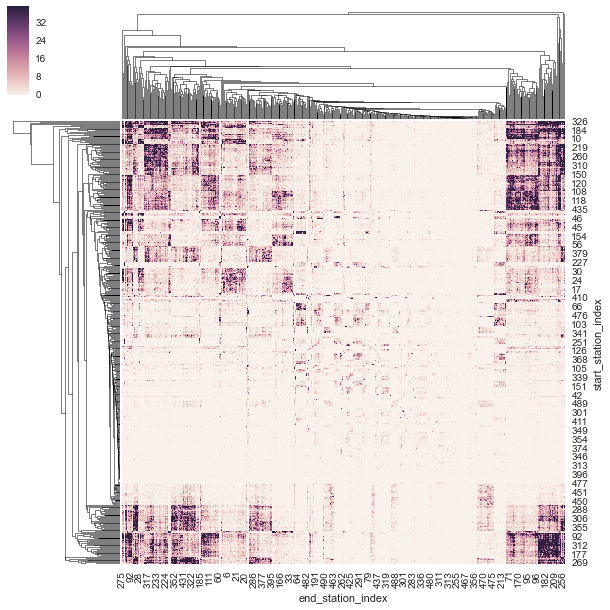

In [446]:
sns.clustermap(trip_occurnece_matrix_suscriber, xticklabels=10, yticklabels=10, robust = True )

In [447]:
df_stations

,station_name,station_latitude,station_longitude,location_point,station_index
station_id,,,,,
363,West Thames St,40.708347,-74.017134,"(40.70834698, -74.01713445)",0
2008,Little West St & 1 Pl,40.705693,-74.016777,"(40.70569254, -74.01677685)",1
3002,South End Ave & Liberty St,40.711512,-74.015756,"(40.711512, -74.015756)",2
304,Broadway & Battery Pl,40.704633,-74.013617,"(40.70463334, -74.01361706)",3
195,Liberty St & Broadway,40.709056,-74.010434,"(40.70905623, -74.01043382)",4
260,Broad St & Bridge St,40.703652,-74.011678,"(40.70365182, -74.01167797)",5
360,William St & Pine St,40.707179,-74.008873,"(40.70717936, -74.00887308)",6
319,Fulton St & Broadway,40.711066,-74.009447,"(40.711066, -74.009447)",7
534,Water - Whitehall Plaza,40.702551,-74.012723,"(40.70255065, -74.0127234)",8


In [373]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,trip_duration,start_date,stop_date,trip_distance,trip_distance_manhattan,start_year,end_year,start_month,end_month
96392,704,2014-01-13 12:08:02,2014-01-13 12:19:46,508,W 46 St & 11 Ave,40.763414,-73.996674,212,W 16 St & The High Line,40.743349,...,1,00:11:44,2014-01-13,2014-01-13,0.022483,0.030208,2014,2014,1,1
112861,360,2014-01-14 09:59:09,2014-01-14 10:05:09,229,Great Jones St,40.727434,-73.993790,2010,Grand St & Greene St,40.721655,...,1,00:06:00,2014-01-14,2014-01-14,0.010326,0.014337,2014,2014,1,1
16710,880,2014-01-04 14:12:49,2014-01-04 14:27:29,545,E 23 St & 1 Ave,40.736502,-73.978095,428,E 3 St & 1 Ave,40.724677,...,1,00:14:40,2014-01-04,2014-01-04,0.015319,0.021564,2014,2014,1,1
161708,543,2014-01-17 03:44:43,2014-01-17 03:53:46,252,MacDougal St & Washington Sq,40.732264,-73.998522,445,E 10 St & Avenue A,40.727408,...,2,00:09:03,2014-01-17,2014-01-17,0.017778,0.021958,2014,2014,1,1
241335,989,2014-01-27 07:34:47,2014-01-27 07:51:16,300,Shevchenko Pl & E 6 St,40.728145,-73.990214,422,W 59 St & 10 Ave,40.770513,...,1,00:16:29,2014-01-27,2014-01-27,0.042424,0.044544,2014,2014,1,1
163591,394,2014-01-17 08:10:08,2014-01-17 08:16:42,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,271,Ashland Pl & Hanson Pl,40.685282,...,1,00:06:34,2014-01-17,2014-01-17,0.010086,0.013329,2014,2014,1,1
232740,908,2014-01-25 12:15:27,2014-01-25 12:30:35,497,E 17 St & Broadway,40.737050,-73.990093,473,Rivington St & Chrystie St,40.721101,...,2,00:15:08,2014-01-25,2014-01-25,0.016054,0.017782,2014,2014,1,1
146446,606,2014-01-16 09:17:11,2014-01-16 09:27:17,238,Bank St & Washington St,40.736197,-74.008592,496,E 16 St & 5 Ave,40.737262,...,1,00:10:06,2014-01-16,2014-01-16,0.016237,0.017268,2014,2014,1,1
253343,312,2014-01-27 22:43:52,2014-01-27 22:49:04,173,Broadway & W 49 St,40.760647,-73.984427,449,W 52 St & 9 Ave,40.764618,...,1,00:05:12,2014-01-27,2014-01-27,0.005273,0.007440,2014,2014,1,1
183264,328,2014-01-18 10:12:47,2014-01-18 10:18:15,365,Fulton St & Grand Ave,40.682232,-73.961458,399,Lafayette Ave & St James Pl,40.688515,...,1,00:05:28,2014-01-18,2014-01-18,0.007100,0.009588,2014,2014,1,1


In [622]:
df_stations.head()

,station_name,station_latitude,station_longitude,location_point,station_index,station_elevation
station_id,,,,,,
363,West Thames St,40.708347,-74.017134,"(40.70834698, -74.01713445)",0,0.444348
2008,Little West St & 1 Pl,40.705693,-74.016777,"(40.70569254, -74.01677685)",1,1.010823
3002,South End Ave & Liberty St,40.711512,-74.015756,"(40.711512, -74.015756)",2,0.602172
304,Broadway & Battery Pl,40.704633,-74.013617,"(40.70463334, -74.01361706)",3,4.467061
195,Liberty St & Broadway,40.709056,-74.010434,"(40.70905623, -74.01043382)",4,9.448026


In [688]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'trip_duration', u'start_date',
       u'stop_date', u'trip_distance', u'trip_distance_manhattan',
       u'start_year', u'end_year', u'start_month', u'end_month',
       u'start_station_index', u'end_station_index',
       u'start_station_elevation', u'end_station_elevation',
       u'trip_elevation_delta', u'day_of_week', u'year'],
      dtype='object')

In [ ]:
stations_grouped = df.groupby('start station id')

##### Calculate some fields

In [37]:
df.columns

Index([u'starttime', u'tripduration', u'starttime.1', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'trip_duration', u'start_date',
       u'stop_date', u'trip_distance', u'trip_distance_manhattan',
       u'start_year', u'end_year', u'start_month', u'end_month',
       u'start_station_index', u'end_station_index',
       u'start_station_elevation', u'end_station_elevation',
       u'trip_elevation_delta', u'day_of_week', u'year'],
      dtype='object')

In [39]:
type(df.starttime)

pandas.core.series.Series

In [587]:
# Map datetime to day of week
day_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
df['day_of_week'] = pd.Series(df.index.dayofweek).apply(lambda x: day_list[x]).tolist()

In [598]:
# Map datetime to year
df['year'] = df.index.year

In [ ]:
#euclidean distance of trips
df['trip_distance']= ((df['start station latitude'] - df['end station latitude'])**2 + (df['start station longitude'] - df['end station longitude'])**2).apply(math.sqrt)

In [ ]:
df['trip_distance_manhattan']= ((df['start station latitude'] - df['end station latitude'])**2).apply(math.sqrt) + ((df['start station longitude'] - df['end station longitude'])**2).apply(math.sqrt)

In [576]:
df.trip_distance

starttime
2014-01-13 12:08:02    0.022483
2014-03-16 17:44:16    0.022483
2014-04-12 17:38:45    0.022483
2014-05-31 18:36:22    0.022483
2014-05-11 17:36:15    0.022483
2014-05-02 10:51:46    0.022483
2014-05-18 17:40:53    0.022483
2014-07-13 22:56:54    0.022483
2014-08-18 11:36:21    0.022483
2014-09-18 09:00:21    0.022483
2014-09-18 18:40:43    0.022483
2014-11-04 08:50:07    0.022483
2014-12-17 11:22:07    0.022483
2015-08-26 08:35:12    0.022483
2015-08-07 11:05:31    0.022483
2015-08-07 11:05:34    0.022483
2015-09-06 10:12:44    0.022483
2015-09-25 17:10:43    0.022483
2015-09-21 08:15:18    0.022483
2015-09-21 11:36:56    0.022483
2015-09-25 12:10:15    0.022483
2015-11-08 12:12:15    0.022483
2015-11-11 11:44:26    0.022483
2016-03-12 16:15:57    0.022483
2016-04-07 08:45:23    0.022483
2016-04-06 08:55:59    0.022483
2016-05-02 09:04:21    0.022483
2016-05-28 14:03:13    0.022483
2016-05-15 15:22:31    0.022483
2014-05-17 18:43:51    0.020567
                         ...  

In [614]:
df.groupby(['year','usertype', 'day_of_week'])['trip_distance', 'trip_distance_manhattan',
                                               'trip_elevation_delta'].mean().unpack()

AttributeError: 'DataFrame' object has no attribute 'unpack'

In [230]:
manhattan_dist_by_day = df.pivot_table('trip_distance_manhattan', aggfunc='mean',
                            index='start_date',
                            columns='usertype', )

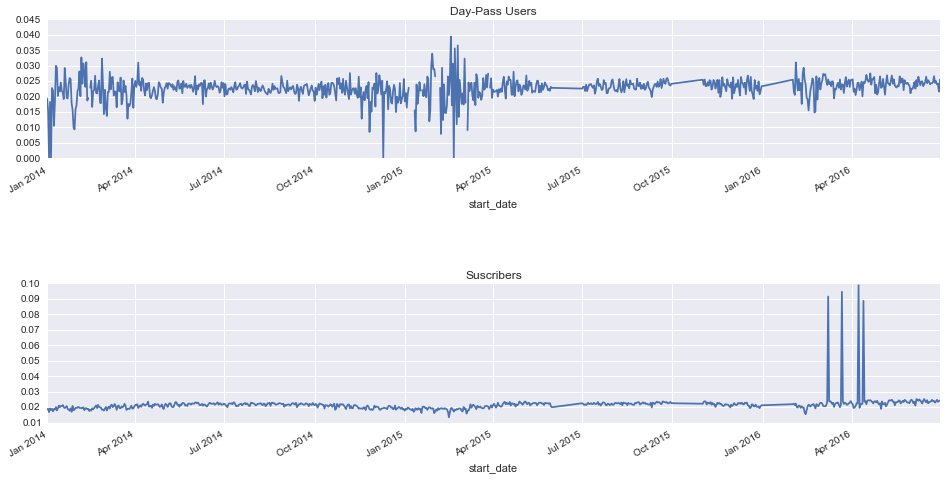

In [240]:
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.9)
manhattan_dist_by_day.Customer.plot(ax=ax[0], title='Day-Pass Users');
manhattan_dist_by_day.Subscriber.plot(ax=ax[1], title='Suscribers');


That's weird. What are these spikes in trip distance for 

In [244]:
df_2016 = df[df.stoptime >= '2016-01-01']
df_2016.head()

# manhattan_dist_by_day.iloc[:, 0].plot(ax=ax[0], title='Day-Pass Users');
# manhattan_dist_by_day.iloc[:, 1].plot(ax=ax[1], title='Suscribers');


# manhattan_dist_2016 = manhattan_dist_by_day[by_date_manhattan.index > '2016-01-01']
# manhattan_dist_2016['Subscriber'].plot()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,trip_duration,start_date,stop_date,trip_distance,trip_distance_manhattan,start_year,end_year,start_month,end_month
748401,1220,2015-12-31 23:56:30,2016-01-01 00:16:51,3153,E 71 St & 2 Ave,40.768175,-73.959103,160,E 37 St & Lexington Ave,40.748238,...,1,0 days 00:20:21,2015-12-31,2016-01-01,0.027685,0.039146,2015,2016,12,1
112665,7329,2015-12-31 22:07:53,2016-01-01 00:10:02,267,Broadway & W 36 St,40.750977,-73.987654,267,Broadway & W 36 St,40.750977,...,0,0 days 02:02:09,2015-12-31,2016-01-01,0.000000,0.000000,2015,2016,12,1
81152,1348932,2015-12-27 17:26:13,2016-01-12 08:08:25,245,Myrtle Ave & St Edwards St,40.693270,-73.977039,3019,NYCBS Depot - DEL,40.716633,...,0,15 days 14:42:12,2015-12-27,2016-01-12,0.023870,0.028257,2015,2016,12,1
544378,1230,2015-12-31 23:43:47,2016-01-01 00:04:18,501,FDR Drive & E 35 St,40.744219,-73.971212,332,Cherry St,40.712199,...,1,0 days 00:20:31,2015-12-31,2016-01-01,0.033071,0.040289,2015,2016,12,1
546251,2348,2015-12-31 23:57:40,2016-01-01 00:36:49,502,Henry St & Grand St,40.714215,-73.981346,3112,Milton St & Franklin St,40.729060,...,1,0 days 00:39:09,2015-12-31,2016-01-01,0.027843,0.038401,2015,2016,12,1


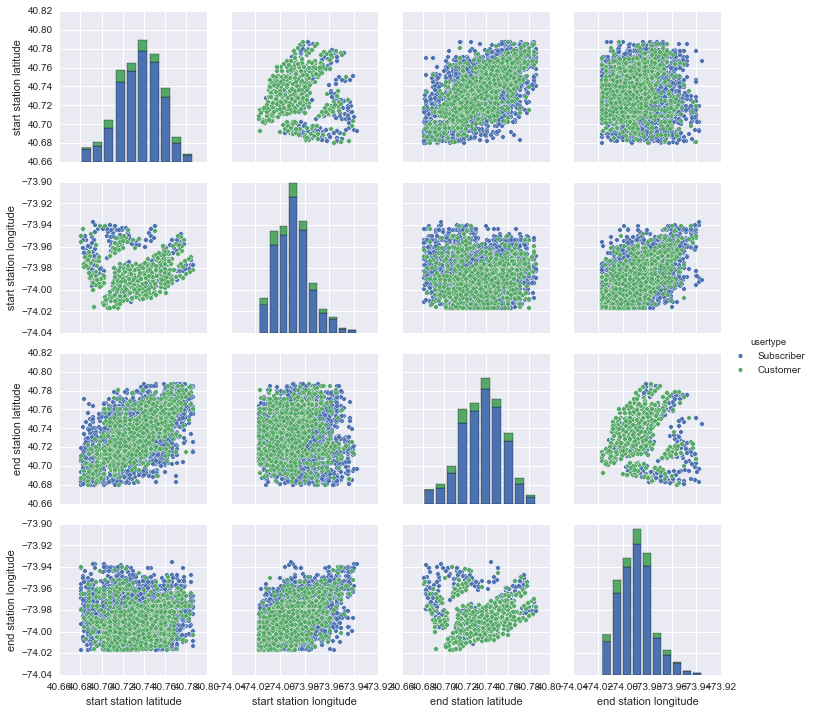

In [255]:
sns.pairplot(df[['start station latitude', 'start station longitude', 
                'end station latitude', 'end station longitude', 'usertype']].sample(10000),
             hue = 'usertype')

In [221]:
df.query("start_date > '2016-01-01' and usertype == 'Subscriber'").groupby('start_date')['']